# Predicting Employee Churn

### Exploratory Analysis
Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

In [1]:
#import modules
import pandas  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
% matplotlib inline

In [2]:
#Loading Dataset
data=pandas.read_csv('HR_comma_sep.csv')

In [3]:
#Top 5 data
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#Check attribute Names and Datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Data Insights
In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [5]:
left = data.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


The describe() function in pandas is convenient in getting various summary statistics. This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Data Visualization
##### Employees Left
Let's check how many employees were left?

Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

In [7]:
left_count = data.groupby('left').count()
left_count

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


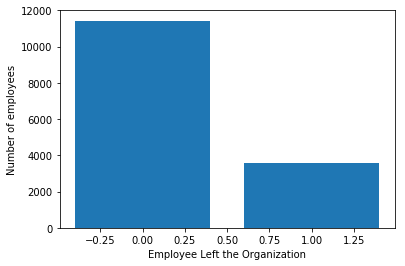

In [8]:
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel("Employee Left the Organization")
plt.ylabel("Number of employees")
plt.show()

In [9]:
data.left.value_counts() #3571 Employees were left

0    11428
1     3571
Name: left, dtype: int64

23% (Count = 3571) of Employees were left

In [13]:
percentage = (data.left.value_counts()*100)/len(data)
percentage # 23% employees left the organization

0    76.191746
1    23.808254
Name: left, dtype: float64

##### Number of Projects
Similarly, you can also plot a bar graph to count the number of employees deployed on How many projects?

In [16]:
num_projects = data.groupby('number_project').count()
num_projects

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
number_project,,,,,,,,,
2,2388,2388,2388,2388,2388,2388,2388,2388,2388
3,4055,4055,4055,4055,4055,4055,4055,4055,4055
4,4365,4365,4365,4365,4365,4365,4365,4365,4365
5,2761,2761,2761,2761,2761,2761,2761,2761,2761
6,1174,1174,1174,1174,1174,1174,1174,1174,1174
7,256,256,256,256,256,256,256,256,256


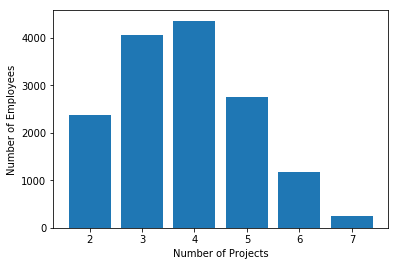

In [20]:
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel("Number of Employees")
plt.show()

##### Time Spent in Company
Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?

In [21]:
emp_exp = data.groupby('time_spend_company').count()
emp_exp

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,left,promotion_last_5years,Departments,salary
time_spend_company,,,,,,,,,
2,3244,3244,3244,3244,3244,3244,3244,3244,3244
3,6443,6443,6443,6443,6443,6443,6443,6443,6443
4,2557,2557,2557,2557,2557,2557,2557,2557,2557
5,1473,1473,1473,1473,1473,1473,1473,1473,1473
6,718,718,718,718,718,718,718,718,718
7,188,188,188,188,188,188,188,188,188
8,162,162,162,162,162,162,162,162,162
10,214,214,214,214,214,214,214,214,214


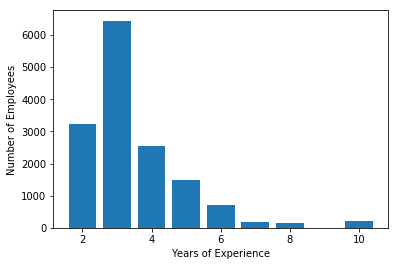

In [22]:
plt.bar(emp_exp.index.values, emp_exp['satisfaction_level'])
plt.xlabel("Years of Experience")
plt.ylabel("Number of Employees")
plt.show()

### Subplots using Seaborn
The previous approach was time-consuming. The better option is here to use Seaborn library and plot all the graphs in a single run using subplots.

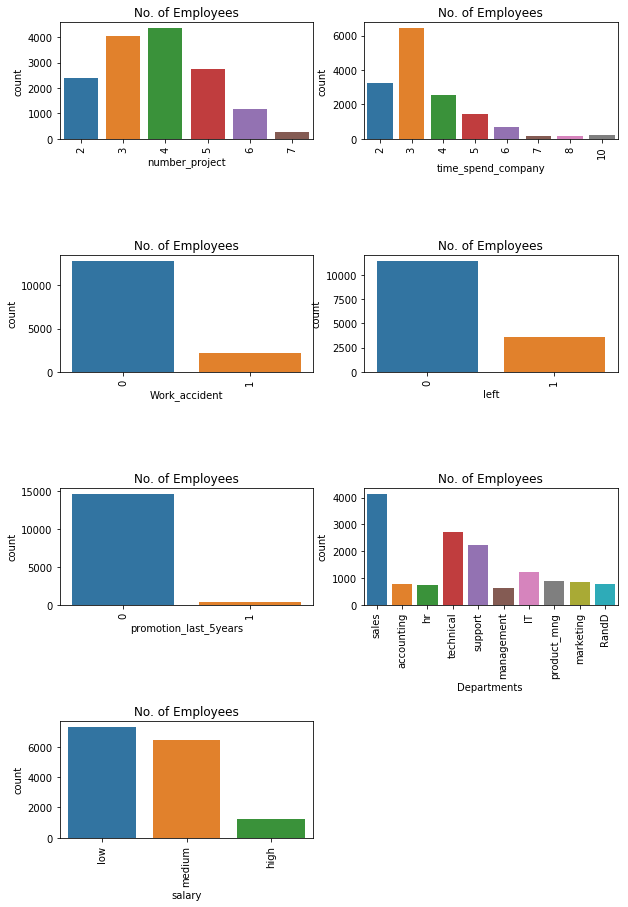

In [30]:
#Using Seaborn (plot all graphs at once)
features = ['number_project', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Departments ', 'salary']
fig = plt.subplots(figsize = (10, 15))
for i, j in enumerate(features):
    plt.subplot(4,2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j, data = data)
    plt.xticks(rotation = 90)
    plt.title("No. of Employees")

You can observe the following points in the above visualization:

* Most of the employee is doing the project from 3-5.

* There is a huge drop between 3 years and 4 years experienced employee.

* The no of employee left is 23 % of the total employment.

* A decidedly less number of employee get the promotion in the last 5 year.

* The sales department is having maximum no.of employee followed by technical and support

* Most of the employees are getting salary either medium or low.

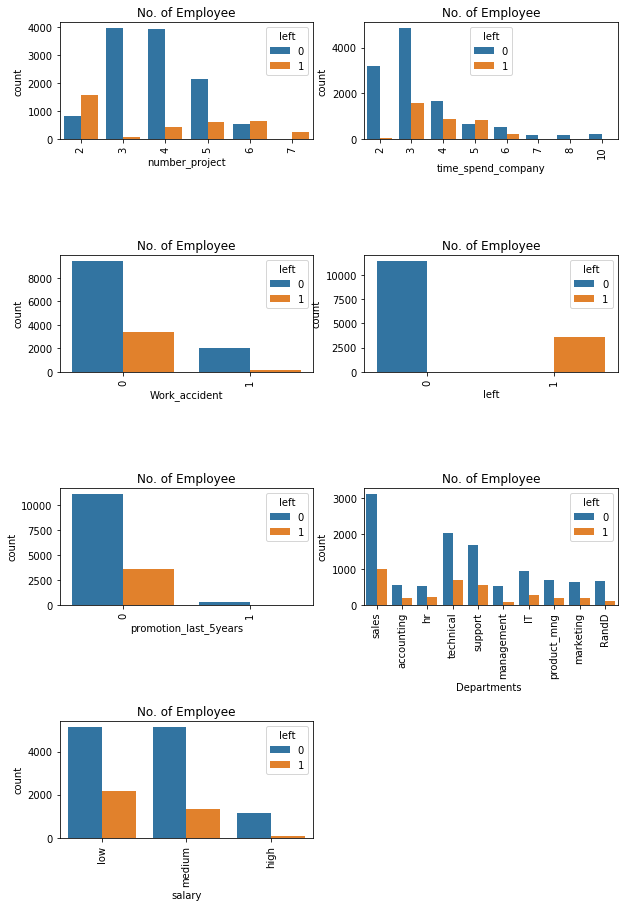

In [34]:
fig = plt.subplots(figsize = (10, 15))
for i, j in enumerate(features):
    plt.subplot(4,2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j, data = data, hue = 'left')
    plt.xticks(rotation=90)
    plt.title("No. of Employee")

You can observe the following points in the above visualization:

* Those employees who have the number of projects more than 5 were left the company.

* The employee who had done 6 and 7 projects, left the company it seems to like that they were overloaded with work.

* The employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving because of affection with the company.

* Those who promotion in last 5 years they didn't leave, i.e., all those left they didn't get the promotion in the previous 5 years.

### Data Analysis and Visualization Summary:
##### Following features are most influencing a person to leave the company:

**Promotions:** Employees are far more likely to quit their job if they haven't received a promotion in the last 5 years.

**Time with Company:** Here, The three-year mark looks like a time to be a crucial point in an employee's career. Most of them quit their job around the three-year mark. Another important point is 6-years point, where the employee is very unlikely to leave.

**Number Of Projects:** Employee engagement is another critical factor to influence the employee to leave the company. Employees with 3-5 projects are less likely to leave the company. The employee with less and more number of projects are likely to leave.

**Salary:** Most of the employees that quit among the mid or low salary groups.

### Cluster Analysis:
Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [35]:
from sklearn.cluster import KMeans

In [39]:
left_emp = data[['satisfaction_level', 'last_evaluation']][data.left == 1]
kmeans = KMeans(n_clusters= 3, random_state= 0).fit(left_emp)

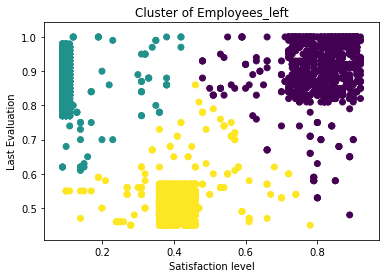

In [40]:
left_emp['label'] = kmeans.labels_
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'])
plt.xlabel("Satisfaction level")
plt.ylabel("Last Evaluation")
plt.title("Cluster of Employees_left")
plt.show()

##### Here, Employee who left the company can be grouped into 3 type of employees:

* High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners.
* Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph), you can also call them Frustrated.

* Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them 'Bad match'.

### Building a Prediction Model
##### Pre-Processing Data
Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column.

In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2.

This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.

In [42]:
#Modeling
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['salary'] = le.fit_transform(data['salary'])
data['Departments '] = le.fit_transform(data['Departments '])

In [44]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


##### Split Train and Test Set
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [46]:
X = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
          'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Departments ', 'salary']]

y = data['left']

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Model Building
Let's build employee an churn prediction model.

Here, you are going to predict churn using Gradient Boosting Classifier.

First, import the GradientBoostingClassifier module and create Gradient Boosting classifier object using GradientBoostingClassifier() function.

Then, fit your model on train set using fit() and perform prediction on the test set using predict().

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

### Evaluating Model Performance

In [77]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.977


In [78]:
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Precision:  0.9738372093023255
Recall:  0.9292649098474342


Well, we got a classification rate of 97%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Gradient Boosting model predicted an employee is going to leave, that employee actually left 95% of the time.

Recall: If there is an employee who left present in the test set and your Gradient Boosting model can identify it 92% of the time.